In [1]:
import random
import numpy as np 

def set_seed(seed_value=42):
    random.seed(seed_value)
    np.random.seed(seed_value)
set_seed(42)

## Load data

In [2]:
import sys
from pathlib import Path

# Path(__file__).parent.parent nếu là file .py, 
# nhưng trong Notebook ta dùng Path.cwd()
root = Path.cwd().parent 
sys.path.append(str(root))

In [3]:
from GP_Solution.load_data import load_data
from GP_Solution.problem_structures import Truck, Drone

In [4]:
json_file_path = Path('..') /'..'/ 'data' / 'WithTimeWindows' / '100.10.1.json'

print("Đường dẫn tuyệt đối:", json_file_path.resolve())

try:
    pro = load_data(json_file_path)
    print("Đọc thành công!")
    print(f"Số lượng requests: {len(pro.requests)}")
    print(f"Số lượng vehicles: {len(pro.vehicles)}")

    # Kiểm tra request đầu tiên
    first_req = pro.requests[0]
    print(f"Request 0 location: {first_req.location}, Demand: {first_req.demand}")

    found_truck = False
    found_drone = False

    for veh in pro.vehicles:
        if found_truck and found_drone:
            break
        if not found_truck and isinstance(veh, Truck):
            truck = veh
            found_truck = True
        elif not found_drone and isinstance(veh, Drone):
            drone = veh
            found_drone = True
    print("Problem time windows: ", pro.depot_time_window[1])
    print(f"Truck velocity: {truck.capacity} | vehicle_id: {truck.id}")
    print(f"Drone velocity: {drone.velocity} | Drone max range: {drone.max_range} | vehicle_id: {drone.id}")

except FileNotFoundError as e:
    print(f"Lỗi: {e}")
except Exception as e:
    print(f"Đã có lỗi xảy ra: {e}")


Đường dẫn tuyệt đối: D:\Project_all\prj3\data\WithTimeWindows\100.10.1.json
Đọc thành công!
Số lượng requests: 100
Số lượng vehicles: 8
Request 0 location: (3686.7818082186177, 4843.61036550108), Demand: 1.1093928409308884
Problem time windows:  3075.3751149579844
Truck velocity: 400.0 | vehicle_id: 1
Drone velocity: 31.2928 | Drone max range: 700.0 | vehicle_id: 5


In [5]:
from GP_Solution.initalization import create_greedy_pop

In [6]:
pop = create_greedy_pop(50)

In [7]:
print(len(pop))

50


In [8]:
for i, ind in enumerate(pop):
    print(f"Individual {i}: {ind.r_tree.depth()} {ind.s_tree.depth()}")
    ind.to_string()

Individual 0: 2 2
R: (add RT3 RT1) | S: (min ST0 ST2)
Individual 1: 1 2
R: RT3 | S: (min ST0 ST2)
Individual 2: 2 1
R: (add RT1 RT3) | S: ST2
Individual 3: 3 1
R: (add RT3 (mul RT3 RT5)) | S: ST0
Individual 4: 2 2
R: (add RT0 RT3) | S: (min ST0 ST2)
Individual 5: 2 2
R: (add RT1 RT2) | S: (min ST0 ST2)
Individual 6: 1 2
R: RT3 | S: (div ST2 ST0)
Individual 7: 1 1
R: RT3 | S: ST2
Individual 8: 5 5
R: (add (sub RT3 (min RT3 RT2)) (add (max (min RT3 RT3) RT4) (sub (mul RT2 RT2) (add RT1 RT1)))) | S: (min ST0 (add (div ST0 (mul ST2 ST2)) ST0))
Individual 9: 1 1
R: RT1 | S: ST0
Individual 10: 1 1
R: RT3 | S: ST0
Individual 11: 1 5
R: RT2 | S: (max ST2 (sub ST0 (max (sub ST2 ST2) (sub ST2 ST2))))
Individual 12: 5 1
R: (add RT5 (mul RT3 (max (mul RT1 RT3) (max RT3 RT4)))) | S: ST0
Individual 13: 5 1
R: (min (add (sub (max RT3 RT1) RT5) (min (add RT3 RT1) (mul RT3 RT2))) RT1) | S: ST2
Individual 14: 5 5
R: (min (min (max RT3 (sub RT3 RT1)) (min (min RT2 RT0) (mul RT2 RT2))) (add RT3 RT3)) | S:

In [9]:
from GP_Solution.nsga2_algorithm import run_gphh_evolution

In [ ]:
# --- CHẠY THỬ NGHIỆM ---

# 1. Load Problem
problem_instance = load_data(json_file_path)
print(f"Problem Loaded: {len(problem_instance.requests)} requests, {len(problem_instance.vehicles)} vehicles")

# 2. Chạy thuật toán GPHH
POP_SIZE = 300
GENS = 200
c_rate = 0.8
m_rate = 0.2
tourn_s_size = 4

final_pop, pareto, history = run_gphh_evolution(
    problem_instance, 
    pop_size=POP_SIZE, 
    max_generations=GENS, 
    max_depth=5,
    c_rate=c_rate,
    m_rate=m_rate,
    tourn_s_size=tourn_s_size,
)

print("\n=== FINAL PARETO FRONT ===")
print(f"Found {len(pareto)} non-dominated solutions.")

for i, ind in enumerate(pareto):
    close_time = problem_instance.depot_time_window[1]
    raw_makespan = (1.0 - ind.f2) * close_time
    
    print(f"\nSolution {i+1}:")
    print(f"  Served Ratio: {ind.f1:.2%} ({int(ind.f1*len(problem_instance.requests))} reqs)")
    print(f"  Makespan:     {raw_makespan:.1f}")
    print(f"  Rule R: {ind.r_tree.to_string()}")
    print(f"  Rule S: {ind.s_tree.to_string()}")

Problem Loaded: 100 requests, 8 vehicles
Gen   1 | Best Ratio: 0.790 | Best Time Score: 0.452
Gen   2 | Best Ratio: 0.790 | Best Time Score: 0.452
Gen   3 | Best Ratio: 0.810 | Best Time Score: 0.452
Gen   4 | Best Ratio: 0.810 | Best Time Score: 0.452
Gen   5 | Best Ratio: 0.850 | Best Time Score: 0.452
Gen   6 | Best Ratio: 0.850 | Best Time Score: 0.452
Gen   7 | Best Ratio: 0.850 | Best Time Score: 0.452
Gen   8 | Best Ratio: 0.850 | Best Time Score: 0.452
Gen   9 | Best Ratio: 0.850 | Best Time Score: 0.452
Gen  10 | Best Ratio: 0.850 | Best Time Score: 0.452
Gen  11 | Best Ratio: 0.850 | Best Time Score: 0.452
Gen  12 | Best Ratio: 0.850 | Best Time Score: 0.452
Gen  13 | Best Ratio: 0.850 | Best Time Score: 0.452
Gen  14 | Best Ratio: 0.850 | Best Time Score: 0.452
Gen  15 | Best Ratio: 0.850 | Best Time Score: 0.452
Gen  16 | Best Ratio: 0.850 | Best Time Score: 0.452
Gen  17 | Best Ratio: 0.850 | Best Time Score: 0.452
Gen  18 | Best Ratio: 0.850 | Best Time Score: 0.452
Gen  

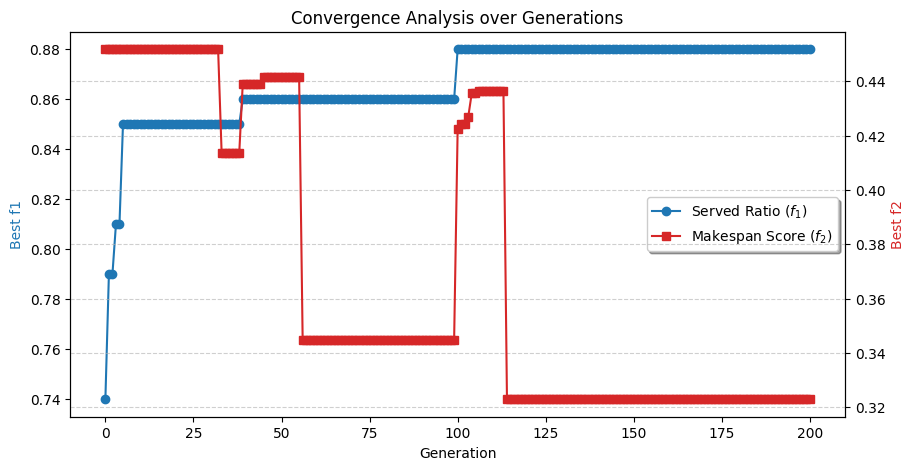

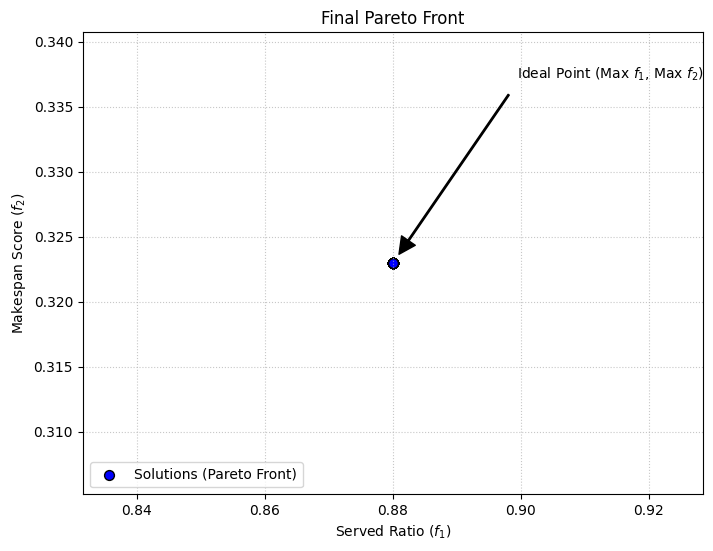

In [11]:
import matplotlib.pyplot as plt

def plot_final_convergence(history):
    gens = [h['gen'] for h in history]
    f1_vals = [h['best_served_ratio'] for h in history]
    f2_vals = [h['best_makespan_score'] for h in history]

    fig, ax1 = plt.subplots(figsize=(10, 5))
    ax2 = ax1.twinx()


    line1, = ax1.plot(gens, f1_vals, color='tab:blue', marker='o', label='Served Ratio ($f_1$)')
    line2, = ax2.plot(gens, f2_vals, color='tab:red', marker='s', label='Makespan Score ($f_2$)')

    lines = [line1, line2]
    labels = [l.get_label() for l in lines]
    ax1.legend(lines, labels, loc='center right', frameon=True, shadow=True)

    ax1.set_xlabel('Generation')
    ax1.set_ylabel('Best f1', color='tab:blue')
    ax2.set_ylabel('Best f2', color='tab:red')
    plt.title('Convergence Analysis over Generations')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

plot_final_convergence(history)
def plot_final_pareto(pareto):
    f1_vals = [ind.f1 for ind in pareto]
    f2_vals = [ind.f2 for ind in pareto]

    plt.figure(figsize=(8, 6))
    plt.scatter(f1_vals, f2_vals, c='blue', edgecolors='k', s=50, label='Solutions (Pareto Front)')

    plt.annotate('Ideal Point (Max $f_1$, Max $f_2$)', 
                 xy=(max(f1_vals), max(f2_vals)), 
                 xytext=(0.7, 0.9), textcoords='axes fraction', 
                 arrowprops=dict(facecolor='black', shrink=0.05, width=1))

    plt.xlabel('Served Ratio ($f_1$)') 
    plt.ylabel('Makespan Score ($f_2$)') 
    plt.title('Final Pareto Front')
    plt.legend(loc='lower left') 
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.show()

plot_final_pareto(pareto)